## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import calendar
import datetime as date
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

## Transactions Path:
Level 1: Exploring (1 point per task)
1. How many transactions are there in the dataset?
2. What is the value of the largest transaction made and to which account/accounts was it made?
a. Get the name, gender, age, and the city this client lives in
3. Which account(s) had the largest balance and what date was this? How does this compare to the balance of this
account to the latest date?
4. Create a histogram and box plot displaying the amounts distribution
5. Split the amounts into bins:
a. '<100'
b. '100-250'
c. '250-500'
d. '500-1K'
e. '1K-2K'
f. '2K-4K'
g. '4K-8K'
h. '8K-15K'
i. '15K-30K'
j. '30K-60K'
k. '>60K'
6. How many debit and credit transactions are there?
7. What are the different types of transaction operations?
8. What are the different K Symbol values?
9. Which top/bottom 3 banks have the highest count of transactions?
10. Which top/bottom 3 banks have the highest value of transactions?

In [2]:
trans_data = pd.read_csv('completedtrans.csv',low_memory=False)

trans_data = trans_data.drop('Unnamed: 0',axis=1)


trans_data = trans_data.set_index('trans_id')

1. How many transactions are there in the dataset?

In [3]:
trans_data.shape[0]

1056320

2. What is the value of the largest transaction made and to which account/accounts was it made?
       a. Get the name, gender, age, and the city this client lives in

In [4]:
trans_data.loc[trans_data['amount']==trans_data['amount'].max()]

,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime
trans_id,,,,,,,,,,,,,,
T00291346,A00000998,Debit,Cash Withdrawal,87400.0,22168.9,NaN,NaN,NaN,2018,12,15,2018-12-15,13:46:25,2018-12-15T13:46:25


In [5]:
clinet_data = pd.read_csv('completedclient.csv')
disposition_data = pd.read_csv('completeddisposition.csv')

In [6]:
disposition_data[disposition_data['account_id'] == 'A00000998']

,disp_id,client_id,account_id,type
1144,D00001202,C00001202,A00000998,Owner


In [7]:
clinet_data[clinet_data['client_id'] == 'C00001202']

,client_id,sex,fulldate,day,month,year,age,social,first,middle,last,phone,email,address_1,address_2,city,state,zipcode,district_id
1144,C00001202,Female,2000-10-11,11,10,2000,19,912-15-5813,Johanna,Danna,Summers,506-684-4619,johanna.summers@outlook.com,360 Greenview St.,NaN,Charleston,WV,47724,47


3. Which account(s) had the largest balance and what date was this? How does this compare to the balance of this
account to the latest date?

In [8]:
largest_balance = trans_data['balance'].max()
trans_data[trans_data['balance'] == largest_balance] 

,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime
trans_id,,,,,,,,,,,,,,
T03170188,A00010520,Credit,Credit in Cash,23857.0,209637.0,NaN,NaN,NaN,2017,5,6,2017-05-06,08:38:26,2017-05-06T08:38:26


In [9]:
trans_data[trans_data['account_id'] == 'A00010520'].sort_values(by='fulldatewithtime',ascending=False).head(1)

,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime
trans_id,,,,,,,,,,,,,,
T03522330,A00010520,Credit,NaN,140.4,28240.1,Interest Credited,NaN,NaN,2018,12,31,2018-12-31,13:32:46,2018-12-31T13:32:46


latest transaction was in Dec-2018 with significant drop in account balance with 28240.1 in total

4. Create a histogram and box plot displaying the amounts distribution

<AxesSubplot:>

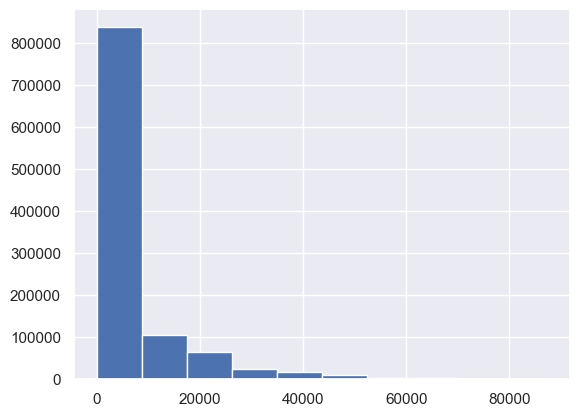

In [10]:
trans_data['amount'].hist()

<AxesSubplot:>

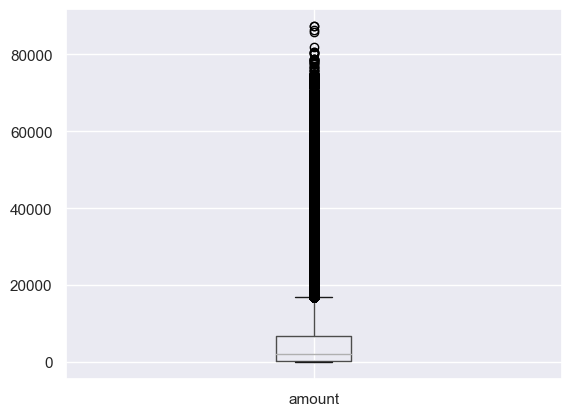

In [11]:
trans_data.boxplot('amount')

5. Split the amounts into bins:

a. '<100'
b. '100-250'
c. '250-500'
d. '500-1K'
e. '1K-2K'
f. '2K-4K'
g. '4K-8K'
h. '8K-15K'
i. '15K-30K'
j. '30K-60K'
k. '>60K'

In [12]:
trans_data['Bins'] = ''

In [13]:
trans_data['Bins'] = np.where(trans_data['amount']<100,'<100',trans_data['Bins'])
trans_data['Bins'] = np.where((trans_data['amount']>=100) & (trans_data['amount'] < 250),'100-250',trans_data['Bins'])
trans_data['Bins'] = np.where((trans_data['amount']>=250) & (trans_data['amount'] < 500),'250-500',trans_data['Bins'])
trans_data['Bins'] = np.where((trans_data['amount']>=500) & (trans_data['amount'] < 1000),'500-1K',trans_data['Bins'])
trans_data['Bins'] = np.where((trans_data['amount']>=1000) & (trans_data['amount'] < 2000),'1K-2K',trans_data['Bins'])
trans_data['Bins'] = np.where((trans_data['amount']>=2000) & (trans_data['amount'] < 4000),'2K-4K',trans_data['Bins'])
trans_data['Bins'] = np.where((trans_data['amount']>=4000) & (trans_data['amount'] < 8000),'4K-8K',trans_data['Bins'])
trans_data['Bins'] = np.where((trans_data['amount']>=8000) & (trans_data['amount'] < 15000),'8K-15K',trans_data['Bins'])
trans_data['Bins'] = np.where((trans_data['amount']>=15000) & (trans_data['amount'] < 30000),'15K-30K',trans_data['Bins'])
trans_data['Bins'] = np.where((trans_data['amount']>=30000) & (trans_data['amount'] < 60000),'30K-60K',trans_data['Bins'])
trans_data['Bins'] = np.where(trans_data['amount']>=60000,'>60K',trans_data['Bins'])

In [14]:
trans_data['Bins'].value_counts()

<100       220174
4K-8K      154003
2K-4K      150732
100-250    120603
8K-15K      96851
15K-30K     95964
1K-2K       84598
500-1K      48574
250-500     43792
30K-60K     39437
>60K         1592
Name: Bins, dtype: int64

6. How many debit and credit transactions are there?

In [15]:
trans_data['type'].value_counts()

Debit     651237
Credit    405083
Name: type, dtype: int64

7. What are the different types of transaction operations?

In [16]:
trans_data['operation'].unique()

array(['Credit in Cash', 'Collection from Another Bank',
       'Cash Withdrawal', nan, 'Remittance to Another Bank',
       'Credit Card Withdrawal'], dtype=object)

8. What are the different K Symbol values?

In [17]:
trans_data['k_symbol'].unique()

array([nan, 'Old Age Pension', 'Interest Credited', 'Household',
       'Payment on Statement', ' ', 'Insurance Payment',
       'Sanction Interest', 'Loan Payment'], dtype=object)

9. Which top/bottom 3 banks have the highest count of transactions?

In [18]:
trans_data.groupby(['bank']).count().sort_values(by='Bins',ascending=True).head(3)

,account_id,type,operation,amount,balance,k_symbol,account,year,month,day,fulldate,fulltime,fulldatewithtime,Bins
bank,,,,,,,,,,,,,,
Bank of America,19597,19597,19597,19597,19597,16382,19597,19597,19597,19597,19597,19597,19597,19597
U.S. Bancorp,19623,19623,19623,19623,19623,16501,19623,19623,19623,19623,19623,19623,19623,19623
Charles Schwab Corp.,20178,20178,20178,20178,20178,16790,20178,20178,20178,20178,20178,20178,20178,20178


In [19]:
trans_data.groupby(['bank'])['Bins'].count()

bank
Bank of America                  19597
Bank of New York Mellon Corp.    21167
Capital One                      21711
Charles Schwab Corp.             20178
Citigroup                        21293
Goldman Sachs                    20525
JPMorgan Chase                   21720
Morgan Stanley                   21234
PNC Financial Services           21094
State Street Corp.               21582
TD Bank                          22285
U.S. Bancorp                     19623
Wells Fargo & Co.                21499
Name: Bins, dtype: int64

10. Which top/bottom 3 banks have the highest value of transactions?

In [20]:
trans_data.groupby(['bank'])['amount'].sum()

bank
Bank of America                  104137717.9
Bank of New York Mellon Corp.    119141947.4
Capital One                      127567388.0
Charles Schwab Corp.             101851386.4
Citigroup                        108391703.6
Goldman Sachs                    111914481.7
JPMorgan Chase                   108354898.8
Morgan Stanley                   110647797.8
PNC Financial Services           109528495.0
State Street Corp.               113133650.7
TD Bank                          117946247.0
U.S. Bancorp                      95541231.7
Wells Fargo & Co.                125956293.3
Name: amount, dtype: float64

Level 2: Analyzing (3 points per task)
1. Which Month has the most transactions? Did this differ over the years? Visualize this.
2. Which day of the month has the most transactions? Did this differ over the years? Visualize this.
3. Which day of the week has the most transactions? Did this differ over the years? Visualize this.
4. Is there a trend or shift in type of transactions over time? Visualize the count & sum of different type of
transactions over time.

1. Which Month has the most transactions? Did this differ over the years? Visualize this.

In [21]:
trans_data['month'].value_counts()

1     122214
12    102520
11     91890
10     90839
6      88276
9      87955
8      86204
7      83791
5      79931
4      76954
3      75364
2      70382
Name: month, dtype: int64

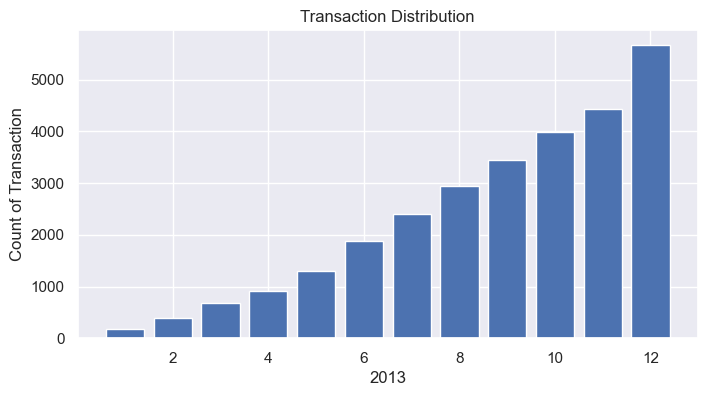

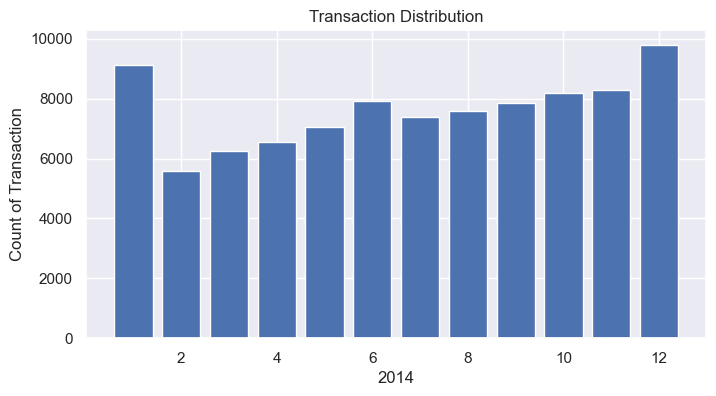

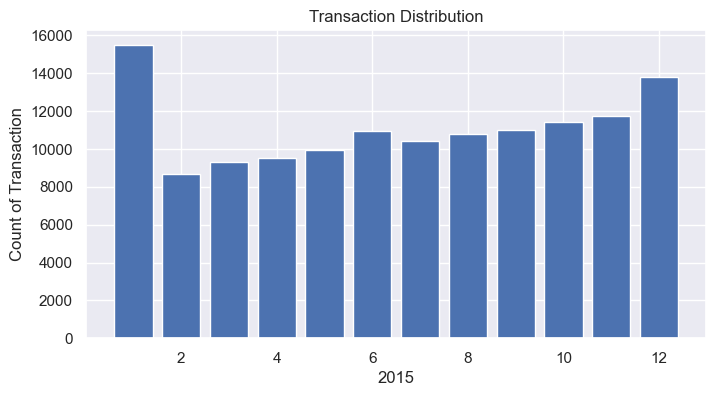

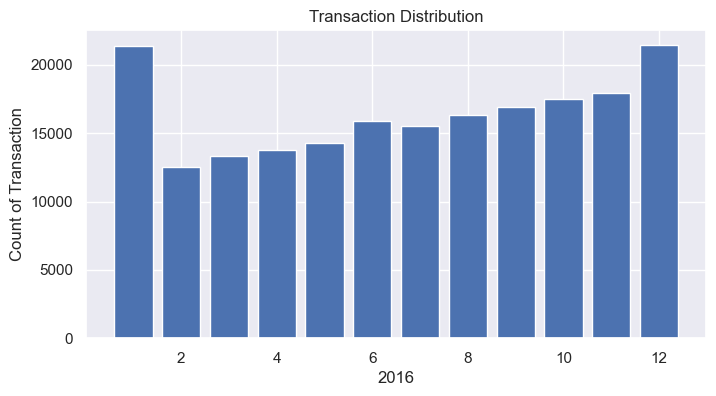

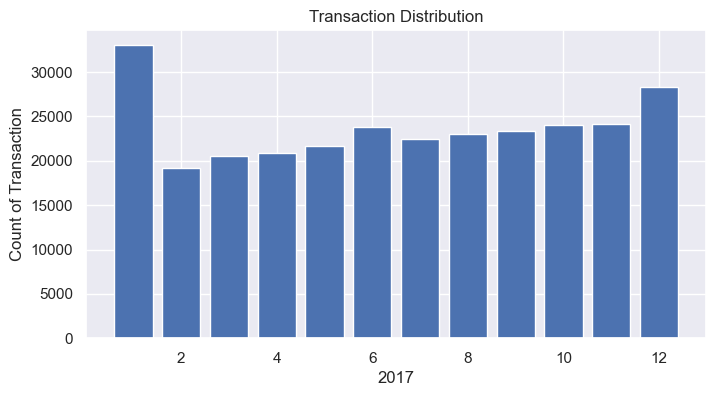

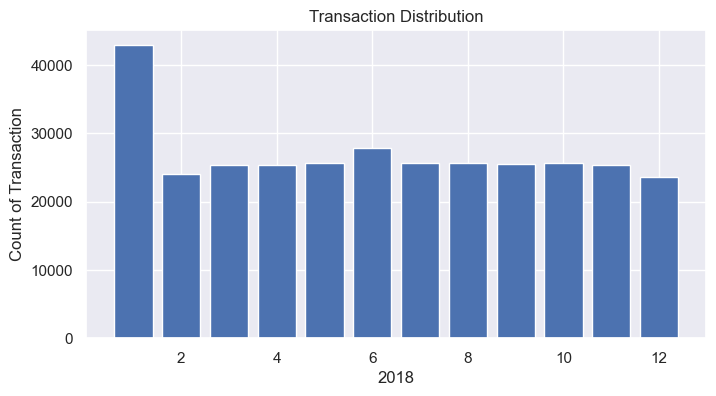

In [22]:
for i in np.arange(trans_data['year'].unique().shape[0]):
    plt.figure(figsize=(8,4))
    month_cross_year = trans_data[trans_data['year'] == trans_data['year'].unique()[i]]
    plt.bar(month_cross_year['month'].value_counts().keys().sort_values(),month_cross_year['month'].value_counts().sort_index())
    plt.xlabel(trans_data['year'].unique()[i])
    plt.ylabel('Count of Transaction')
    plt.title('Transaction Distribution')
    

2. Which day of the month has the most transactions? Did this differ over the years? Visualize this.


In [23]:
trans_data['day'].value_counts()

31    202082
30    128499
12     60723
14     48006
13     47420
5      47250
6      46226
9      45358
8      45188
7      45022
11     44884
10     43929
28     32458
29     15162
18     14816
17     13185
15     13088
16     13070
2      12039
4      11952
20     11790
19     11779
3      11761
1      11560
21     11476
22     11406
23     11348
25     11244
24     11237
26     11202
27     11160
Name: day, dtype: int64

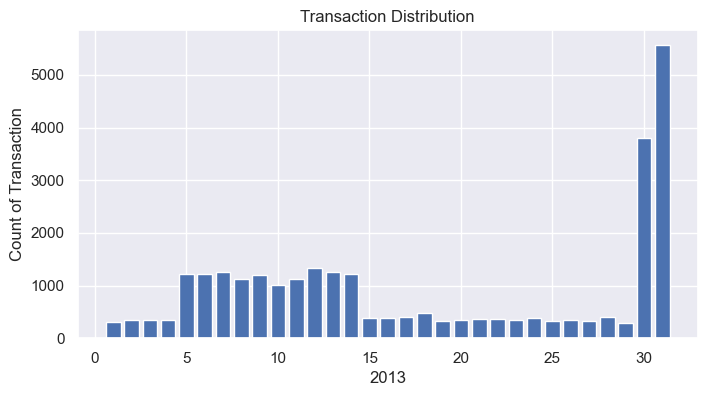

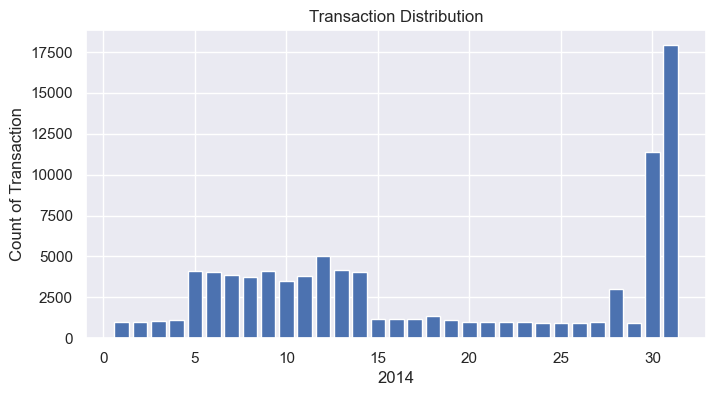

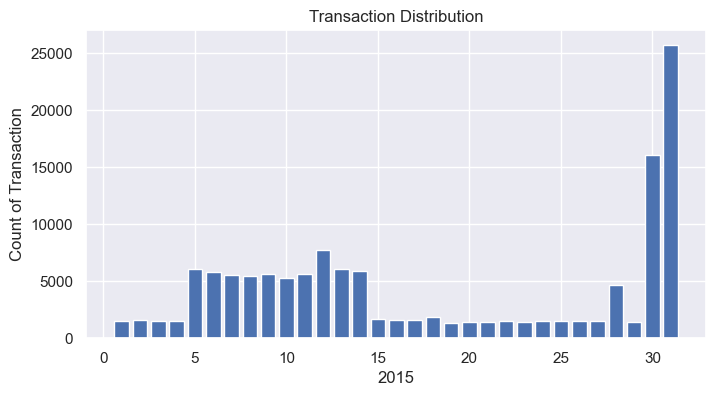

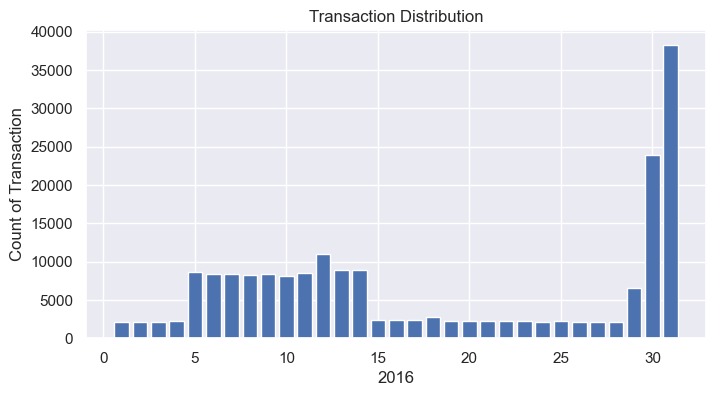

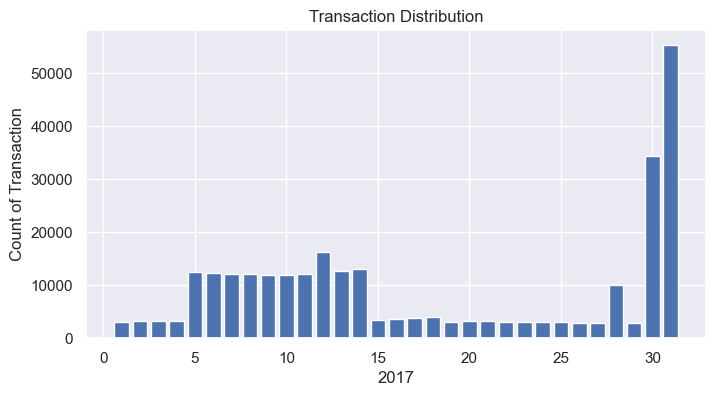

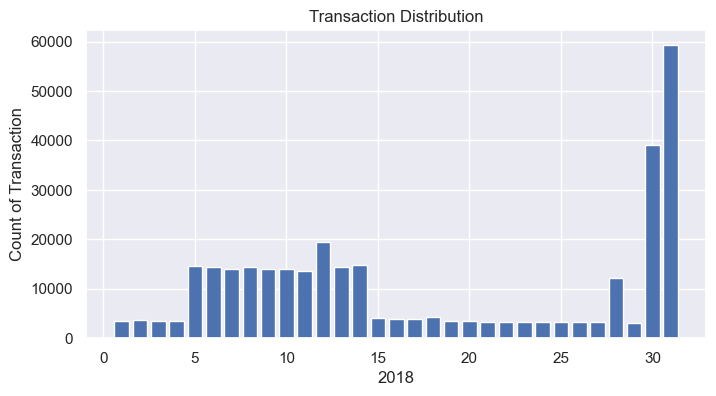

In [24]:
for i in np.arange(trans_data['year'].unique().shape[0]):
    plt.figure(figsize=(8,4))
    month_cross_year = trans_data[trans_data['year'] == trans_data['year'].unique()[i]]
    plt.bar(month_cross_year['day'].value_counts().keys().sort_values(),month_cross_year['day'].value_counts().sort_index())
    plt.xlabel(trans_data['year'].unique()[i])
    plt.ylabel('Count of Transaction')
    plt.title('Transaction Distribution')
    

3. Which day of the week has the most transactions? Did this differ over the years? Visualize this.

In [25]:
trans_data['fulldate'] = pd.to_datetime(trans_data['fulldate'])
trans_data['day_name'] = trans_data['fulldate'].dt.day_name()

In [26]:
trans_data['day_name'].value_counts()

Wednesday    158499
Saturday     153516
Friday       151553
Tuesday      149919
Thursday     149265
Monday       148410
Sunday       145158
Name: day_name, dtype: int64

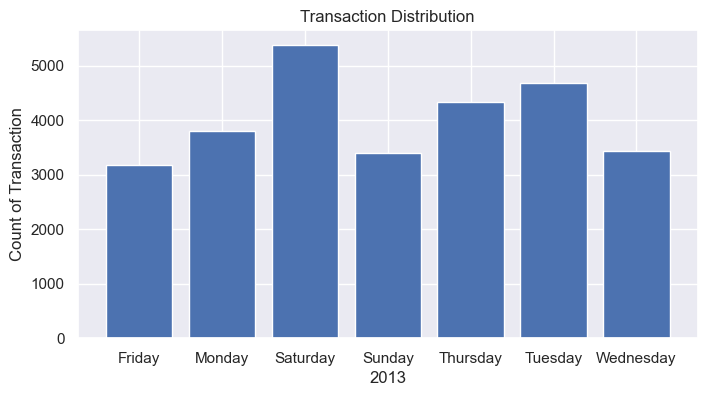

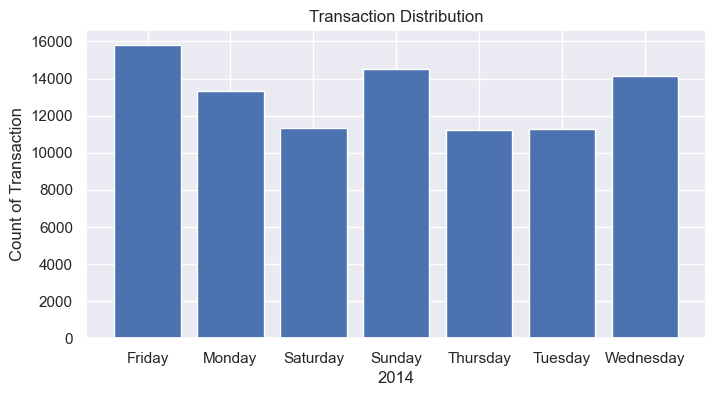

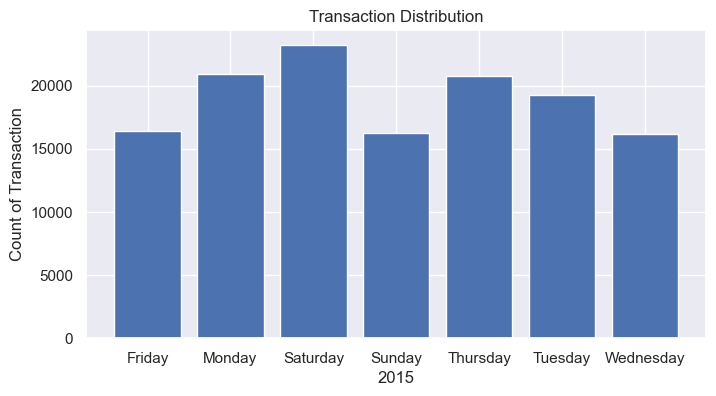

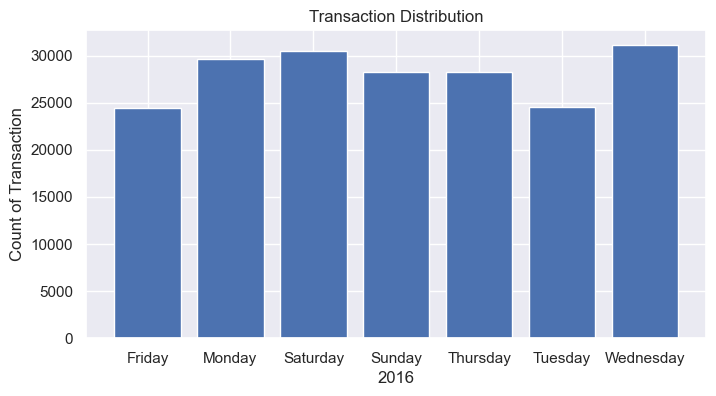

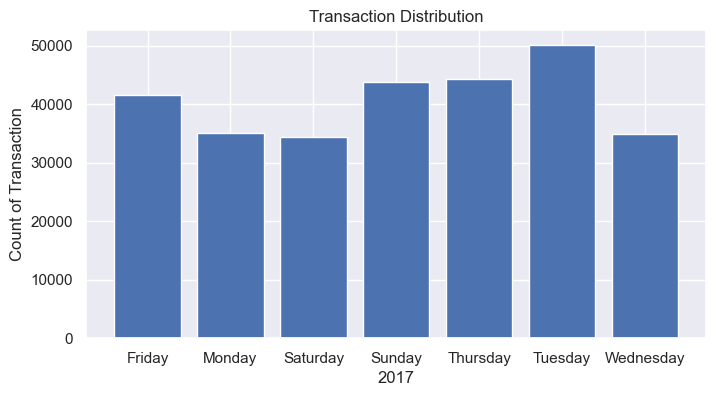

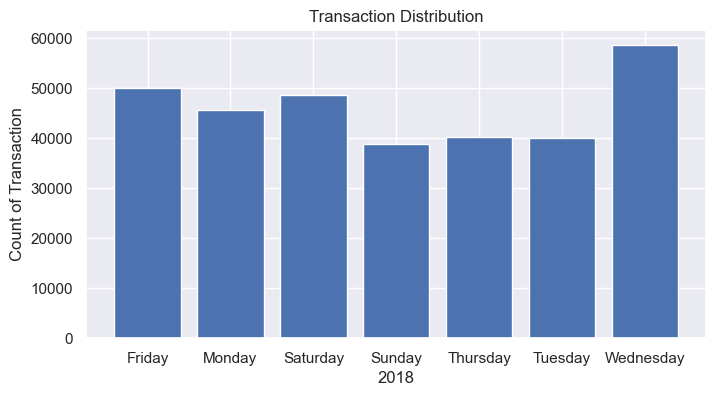

In [27]:
for i in np.arange(trans_data['year'].unique().shape[0]):
    plt.figure(figsize=(8,4))
    month_cross_year = trans_data[trans_data['year'] == trans_data['year'].unique()[i]]
    plt.bar(month_cross_year['day_name'].value_counts().keys().sort_values(),month_cross_year['day_name'].value_counts().sort_index())
    plt.xlabel(trans_data['year'].unique()[i])
    plt.ylabel('Count of Transaction')
    plt.title('Transaction Distribution')

4. Is there a trend or shift in type of transactions over time? Visualize the count & sum of different type of
transactions over time.

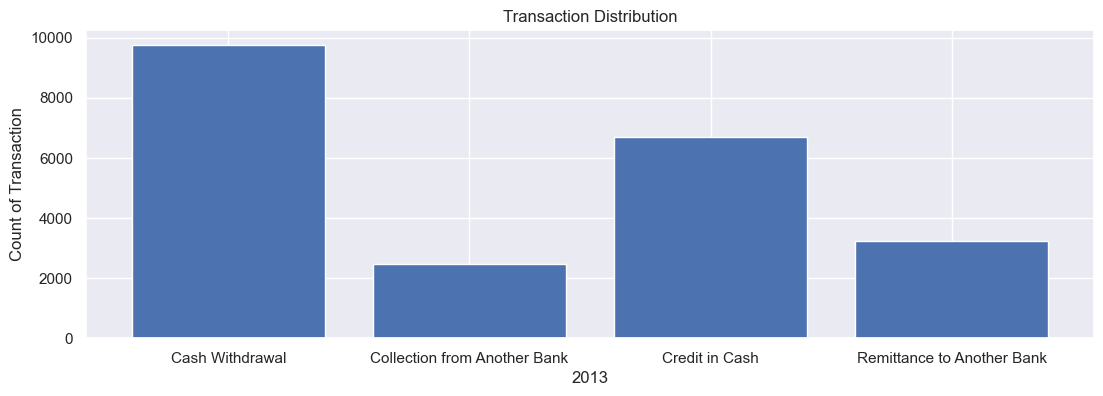

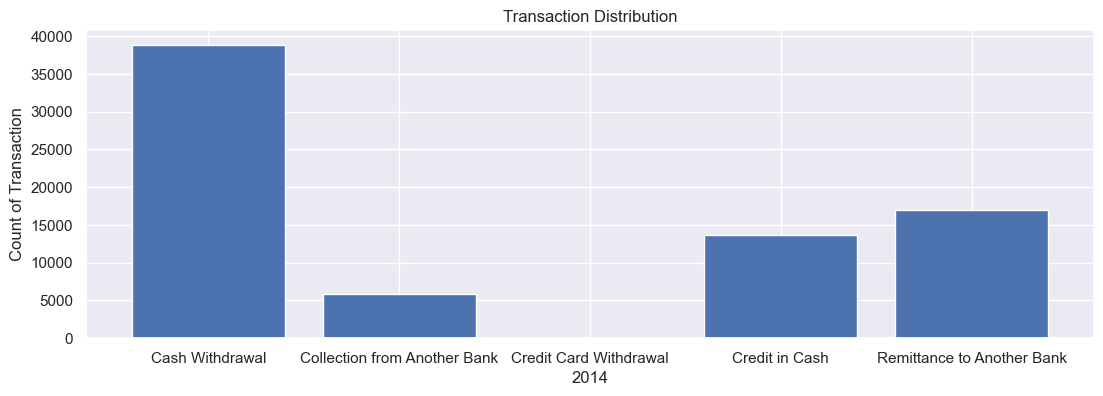

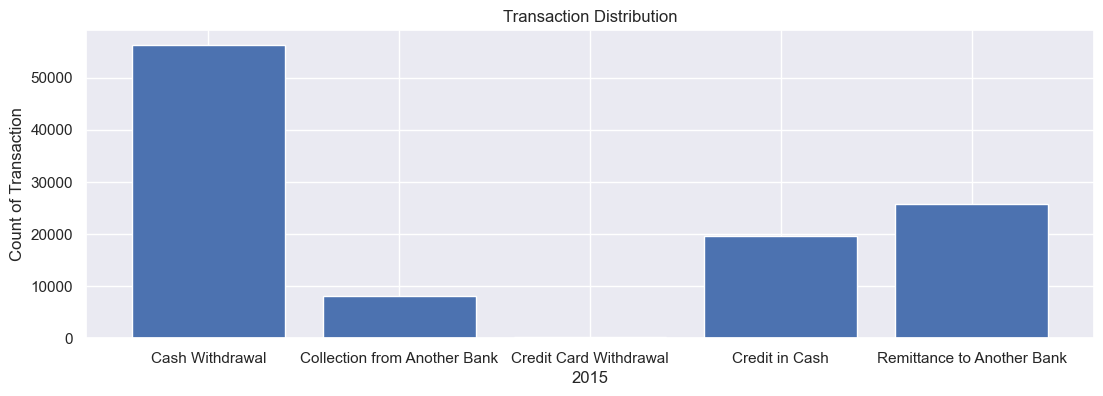

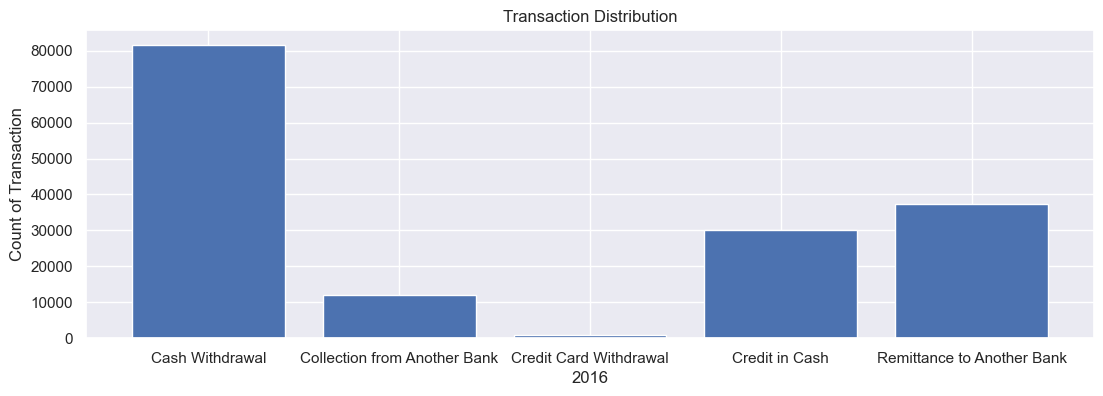

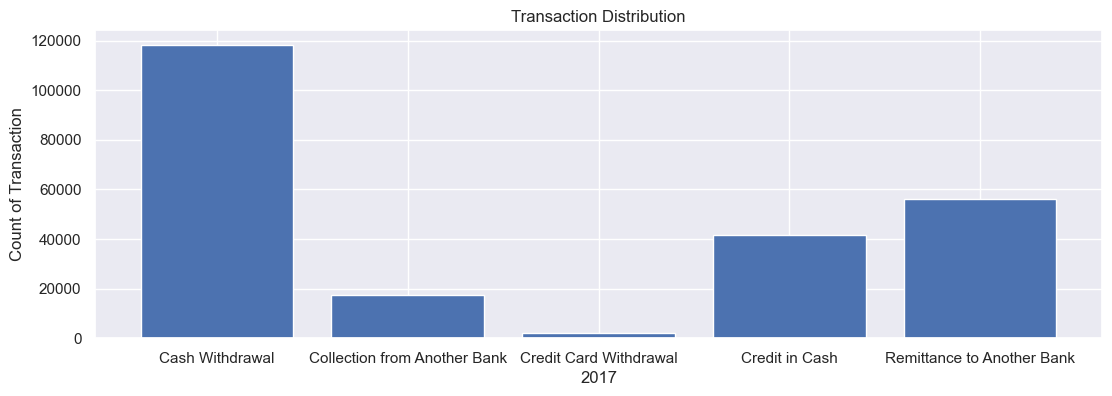

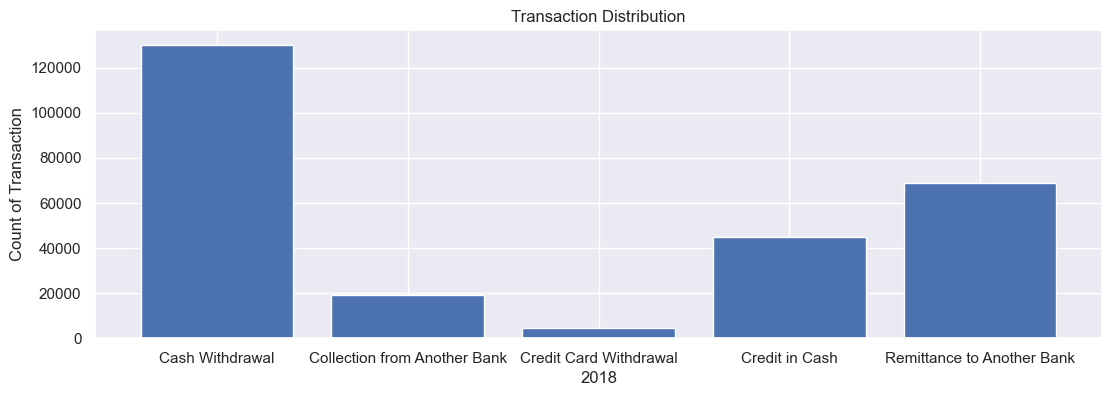

In [28]:
for i in np.arange(trans_data['year'].unique().shape[0]):
    plt.figure(figsize=(13,4))
    month_cross_year = trans_data[trans_data['year'] == trans_data['year'].unique()[i]]
    plt.bar(month_cross_year['operation'].value_counts().keys().sort_values(),month_cross_year['operation'].value_counts().sort_index())
    plt.xlabel(trans_data['year'].unique()[i])
    plt.ylabel('Count of Transaction')
    plt.title('Transaction Distribution')

Level 3: Modeling
1. Create a model to predict the transaction operation (15 points)
a. Try out at least 3 different models, and comment on why you chose these models
b. Measure accuracy (at least one model should have accuracy of 80% or higher)
2. Time to clean up your work. Organize your notebook, gather your findings, prepare recommendations and get
ready to present them. (5 points)
3. Bonus: Repeat the same process by creating a model to predict the transaction "k_symbol"

1. Create a model to predict the transaction operation (15 points)

a. Try out at least 3 different models, and comment on why you chose these models

b. Measure accuracy (at least one model should have accuracy of 80% or higher)

In [29]:
raw_data = trans_data.copy()

In [30]:
raw_data.isnull().sum()

account_id               0
type                     0
operation           183114
amount                   0
balance                  0
k_symbol            481881
bank                782812
account             760931
year                     0
month                    0
day                      0
fulldate                 0
fulltime                 0
fulldatewithtime         0
Bins                     0
day_name                 0
dtype: int64

In [31]:
raw_data = raw_data.drop(['bank','account','k_symbol'],axis=1)
raw_data['operation'].fillna(raw_data['operation'].mode()[0],inplace=True)

In [32]:
raw_data.isnull().sum()

account_id          0
type                0
operation           0
amount              0
balance             0
year                0
month               0
day                 0
fulldate            0
fulltime            0
fulldatewithtime    0
Bins                0
day_name            0
dtype: int64

In [33]:
raw_data.columns

Index(['account_id', 'type', 'operation', 'amount', 'balance', 'year', 'month',
       'day', 'fulldate', 'fulltime', 'fulldatewithtime', 'Bins', 'day_name'],
      dtype='object')

In [34]:
features = ['type','amount', 'balance','Bins','year', 'month', 'day','operation']
cat_features = ['type','Bins']
raw_data = raw_data[features]

In [35]:
raw_data.columns

Index(['type', 'amount', 'balance', 'Bins', 'year', 'month', 'day',
       'operation'],
      dtype='object')

In [36]:
le = LabelEncoder()

In [37]:
le.fit(raw_data['operation'])

LabelEncoder()

In [38]:
raw_data['operation'] = le.fit_transform(raw_data['operation'])

In [39]:
raw_data['operation'].unique()

array([3, 1, 0, 4, 2])

In [40]:
raw_data.head()

,type,amount,balance,Bins,year,month,day,operation
trans_id,,,,,,,,
T00695247,Credit,700.0,700.0,500-1K,2013,1,1,3
T00171812,Credit,900.0,900.0,500-1K,2013,1,1,3
T00207264,Credit,1000.0,1000.0,1K-2K,2013,1,1,3
T01117247,Credit,600.0,600.0,500-1K,2013,1,1,3
T00579373,Credit,400.0,400.0,250-500,2013,1,2,3


In [41]:
raw_data = pd.get_dummies(raw_data,columns=cat_features,drop_first=True)

In [42]:
inputs = raw_data.drop(['operation'],axis=1)
target = raw_data['operation']

In [43]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,random_state=1234)

## Model 1

In [44]:
model_1 = LogisticRegression()
solvers = ['sag','lbfgs']
penalty = ['l2']
c_values = [0.01,0.1,0.2,0.5,0.8,10]


grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_1, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.605208 using {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
0.605208 (0.000587) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
0.604066 (0.001098) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.605193 (0.000570) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
0.603403 (0.001280) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.605191 (0.000563) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'sag'}
0.603076 (0.000706) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'lbfgs'}
0.605184 (0.000561) with: {'C': 0.5, 'penalty': 'l2', 'solver': 'sag'}
0.603023 (0.000588) with: {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
0.605205 (0.000586) with: {'C': 0.8, 'penalty': 'l2', 'solver': 'sag'}
0.603018 (0.001023) with: {'C': 0.8, 'penalty': 'l2', 'solver': 'lbfgs'}
0.605189 (0.000541) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.603319 (0.000673) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\Amro Ewes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Model 2

In [45]:
model_2 = RandomForestClassifier(random_state=1234)
model_2.fit(x_train,y_train)
predict_target_2 = model_2.predict(x_test)
print(classification_report(y_test,predict_target_2))
print(accuracy_score(y_test,predict_target_2))
print(le.inverse_transform([0,1,2,3,4]))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95    123412
           1       0.85      0.88      0.87     13155
           2       0.31      0.07      0.11      1615
           3       0.95      0.94      0.94     31350
           4       0.84      0.93      0.88     41732

    accuracy                           0.93    211264
   macro avg       0.78      0.75      0.75    211264
weighted avg       0.93      0.93      0.93    211264

0.9272568918509543
['Cash Withdrawal' 'Collection from Another Bank' 'Credit Card Withdrawal'
 'Credit in Cash' 'Remittance to Another Bank']


## Model_3

In [46]:
model_3 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model_3.fit(x_train, y_train)
target_3 = model_3.predict(x_test)
print(classification_report(y_test,target_3))
print(accuracy_score(y_test,target_3)*100)

              precision    recall  f1-score   support

           0       0.73      0.82      0.77    123412
           1       0.42      0.40      0.41     13155
           2       0.10      0.03      0.04      1615
           3       0.52      0.44      0.48     31350
           4       0.53      0.41      0.46     41732

    accuracy                           0.65    211264
   macro avg       0.46      0.42      0.43    211264
weighted avg       0.63      0.65      0.64    211264

64.9836223871554
